### 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 벼수 사이에 선형관계가 있다고 할 수 있음.
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 simple linear regression이라고 함. 지도학습
- 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True

In [4]:
df = pd.read_excel('/Users/joy/Documents/GitHub/0Oong/수업내용/dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [12]:
ndf.horsepower = ndf.horsepower.replace({'?':np.nan})
ndf.horsepower = ndf.horsepower.dropna(axis=0)
# ndf['horsepower']=ndf.horsepower.astype('float') 
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


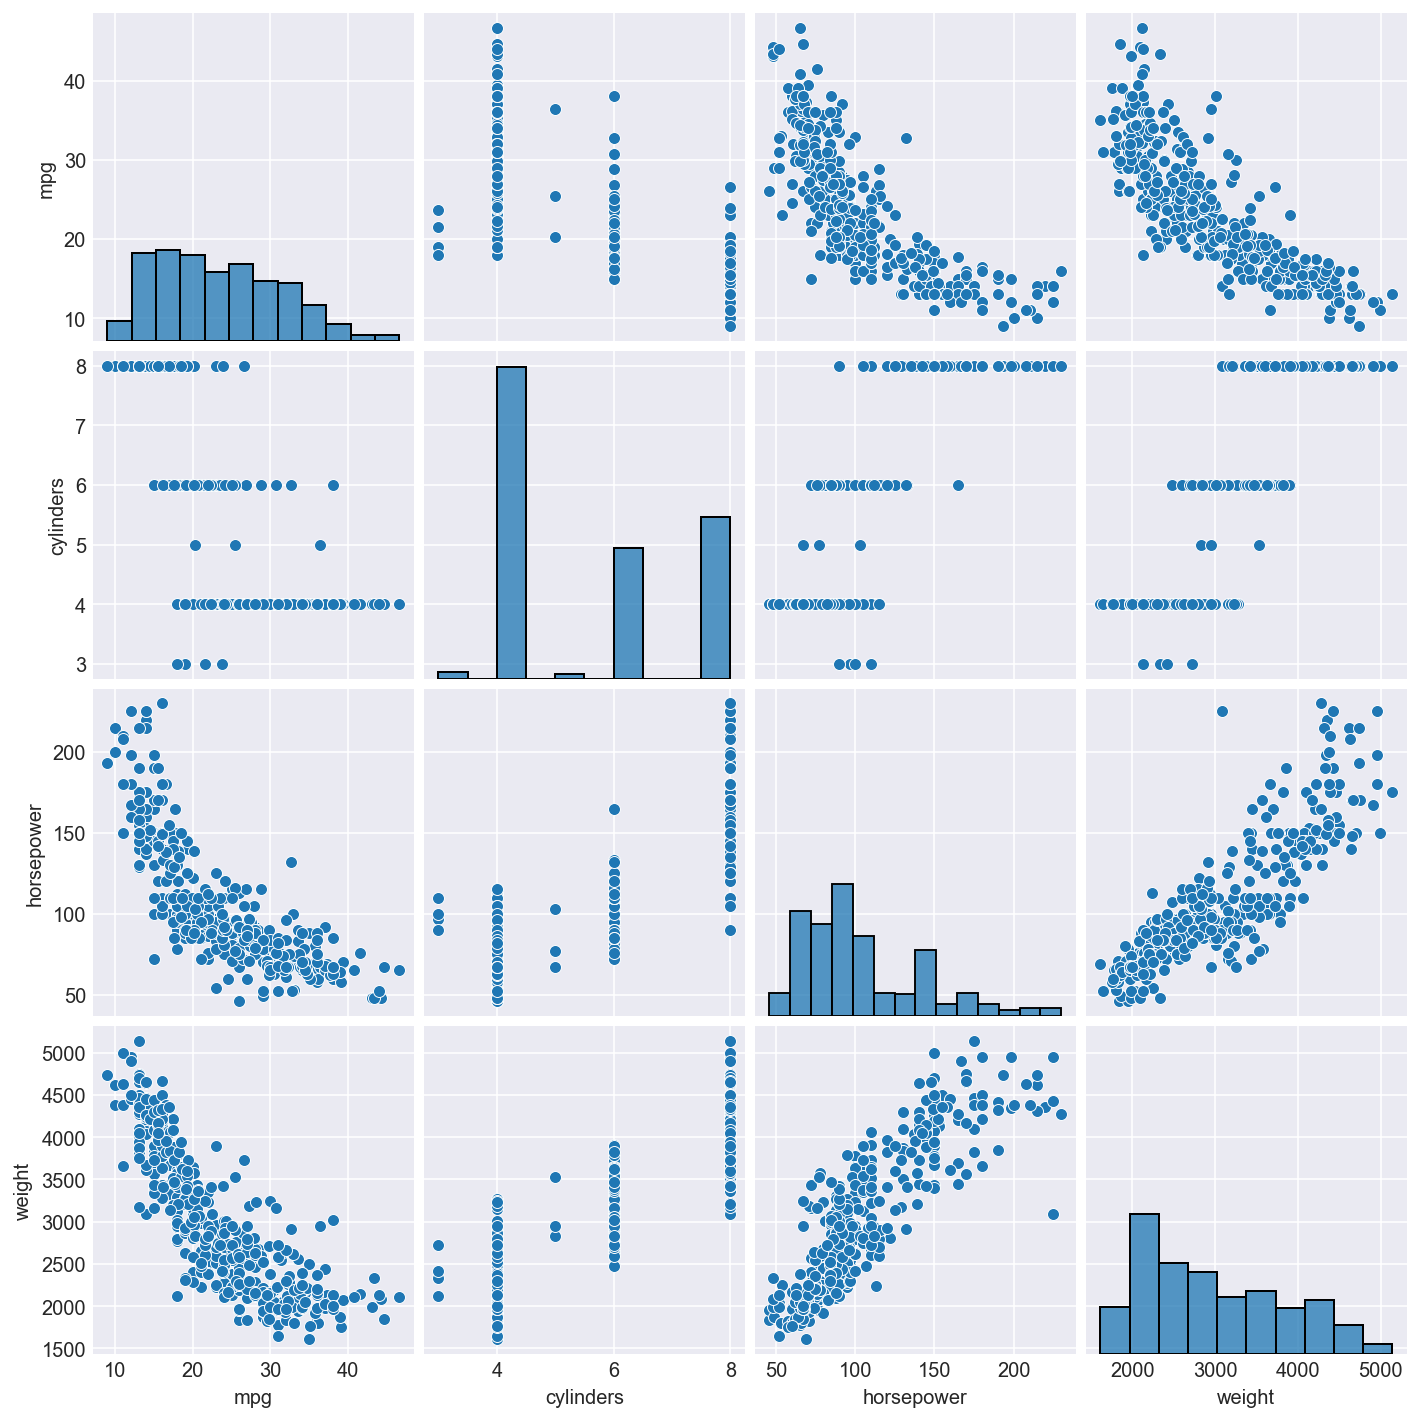

In [13]:
sns.pairplot(ndf)

In [14]:
# 변수(속성) 선택
X = ndf[['weight']] #독립변수, df
y = ndf['mpg'] #종속변수, series

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
y_preds[:5]

array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907])

## 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함.

In [20]:
# 우리가 예측하려는 것은 mpg였음. 그래서 mpg단위에 따라서 값이 다르게 나올 수 있다. 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) #mse에 루트씌워줌
r2 = r2_score(y_test, y_preds)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'. format(mse, rmse, r2))

MSE:22.169, RMSE:4.708, R2 score:0.641


In [21]:
# 기울기
lr.coef_

array([-0.00762163])

In [22]:
print('기울기 a : ', lr.coef_) 
#pairplot에 다르면 weight와 mpg간의 음의 상관관계가 꽤 큰데 여기서는 값이 너무 작게 나옴.
# 이유는 weight는 천단위고 mpg단위가 훨씩 작기 때문임

print('절편 b : ', lr.intercept_)

기울기 a :  [-0.00762163]
절편 b :  45.97121770475769


<AxesSubplot:ylabel='Frequency'>

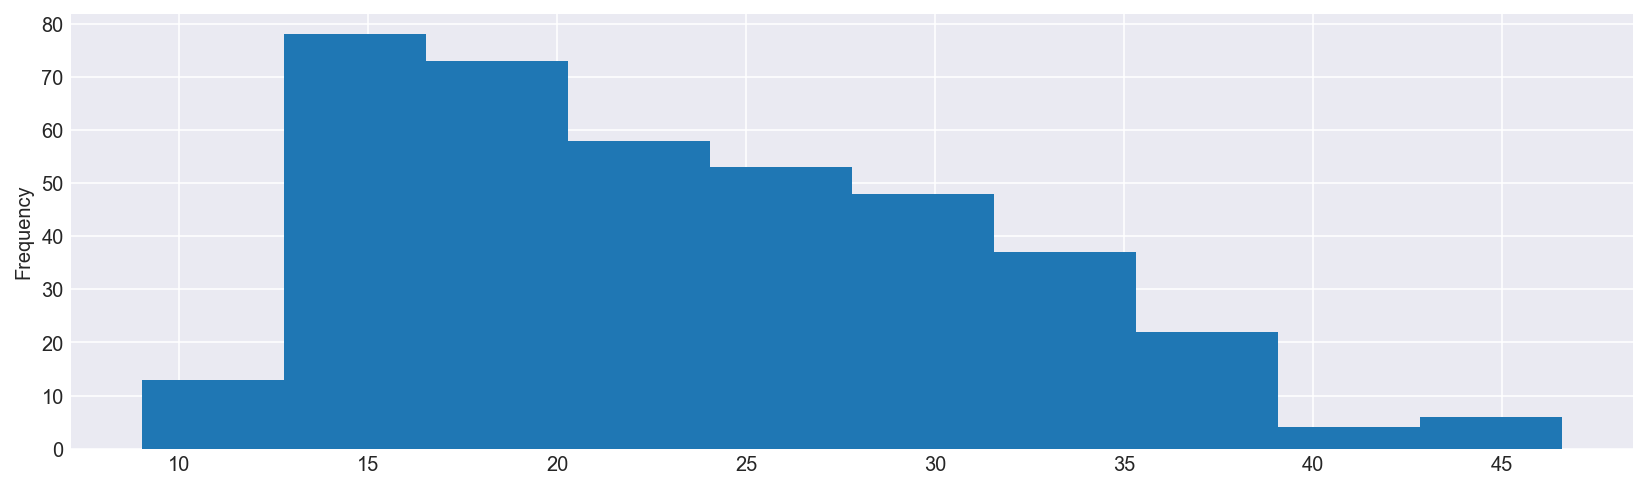

In [23]:
# 실제값도 정규분포가 아님. 
y.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

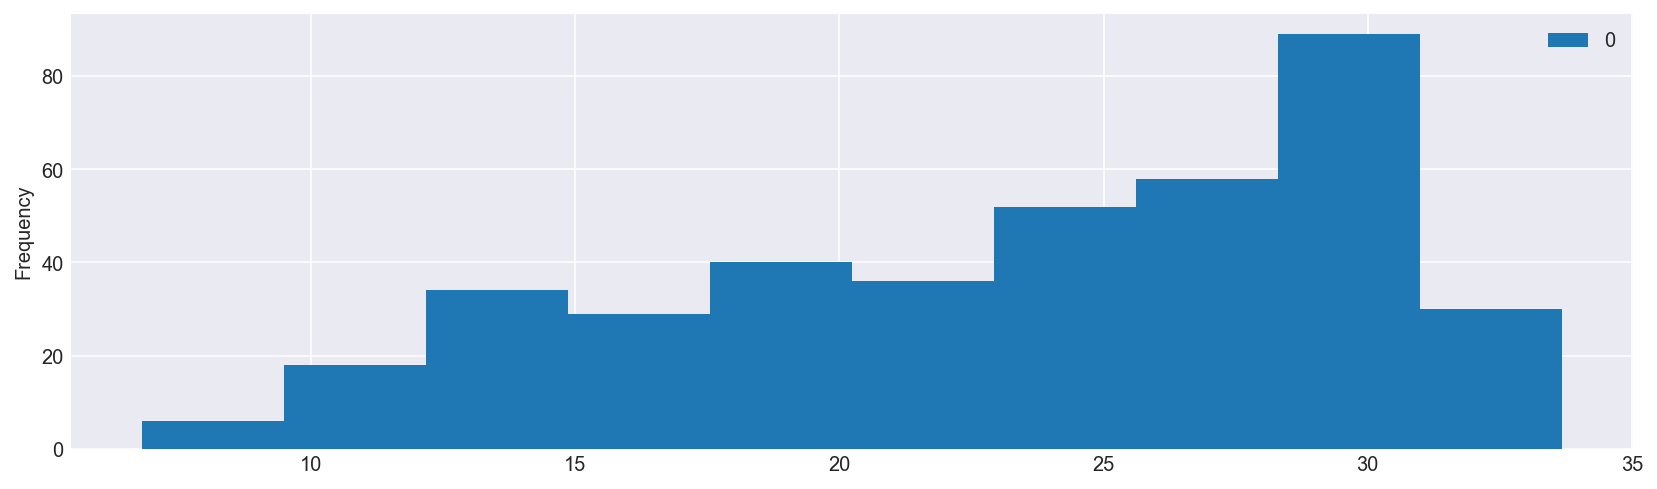

In [26]:
y_hat = lr.predict(X)
pd.DataFrame(y_hat).plot(kind='hist')
# 예측값도 정규분포가 아님, 즉 단순회귀로는 풀기에 무리가 있음

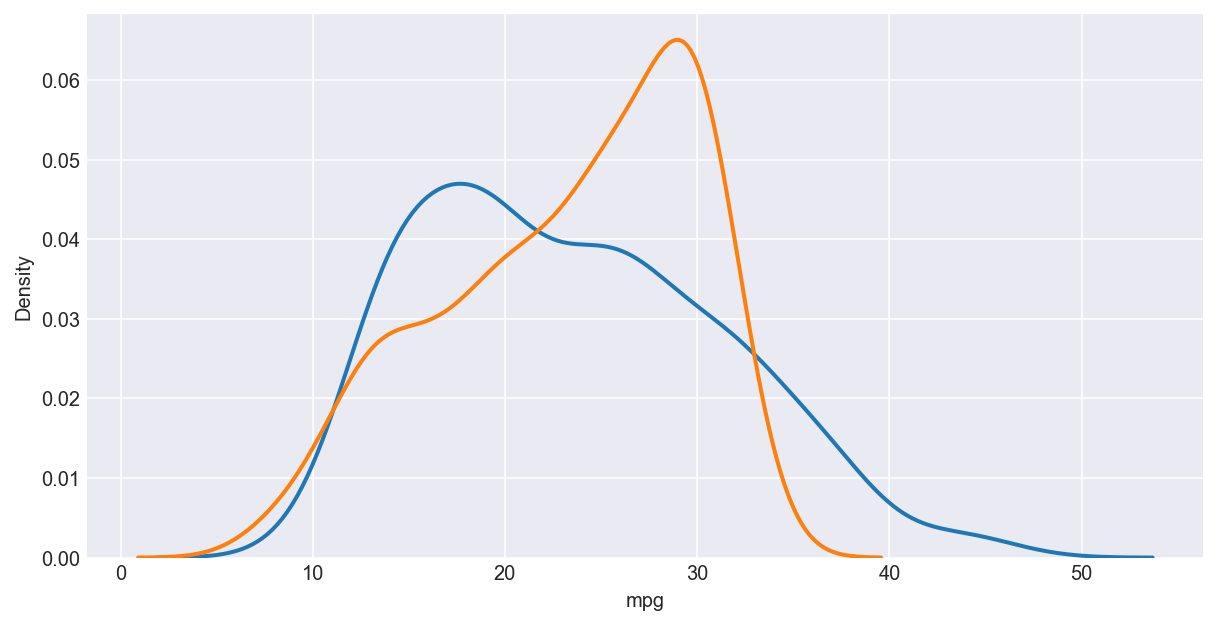

In [30]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat")

# 모양이 매우 달라서 단순회귀선형을 하기에는 좀 어려움
# 그래서 다항회귀를 해봐야



## 다항회귀 분석
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관
- 머신러닝 294~ , 311p(다항회귀)


In [53]:
# 변수(속성) 선택 - 다항식으로변환 
X = ndf[['weight']] #독립변수, df
y = ndf['mpg'] #종속변수, series

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [46]:
X_train.head()

,weight
397,2720
160,3907
143,2300
346,2065
67,4633


In [54]:
from sklearn.preprocessing import PolynomialFeatures #다항식 변환
poly = PolynomialFeatures(degree=2) #2차로 할거면2, 3차로 할 거면 3 다항식중에 2차항 적용
X_train_poly = poly.fit_transform(X_train) #X_train데이터를 2차항으로 변환

print(X_train.shape)
print(X_train_poly.shape)

(274, 1)
(274, 3)


In [55]:
X_train_poly[:5]  #열이 3개임 X_train은 열이 1개였는데


array([[1.0000000e+00, 2.7200000e+03, 7.3984000e+06],
       [1.0000000e+00, 3.9070000e+03, 1.5264649e+07],
       [1.0000000e+00, 2.3000000e+03, 5.2900000e+06],
       [1.0000000e+00, 2.0650000e+03, 4.2642250e+06],
       [1.0000000e+00, 4.6330000e+03, 2.1464689e+07]])

In [58]:
# r2_score()사용
from sklearn.metrics import mean_squared_error, r2_score
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
y_preds_poly=pr.predict(X_test_poly)
r_square = r2_score(y_test, y_preds_poly)
r_square


0.6721104316263187

In [56]:
# score 사용
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
r_square
# 위에보다 더 설명력이 있다 왜냐하면 그래프가 직선형태에서 약간 곡선형태로 표현해 정확히 표현할 수 있게됨. 

0.6721104316263187

Text(0, 0.5, 'mpg')

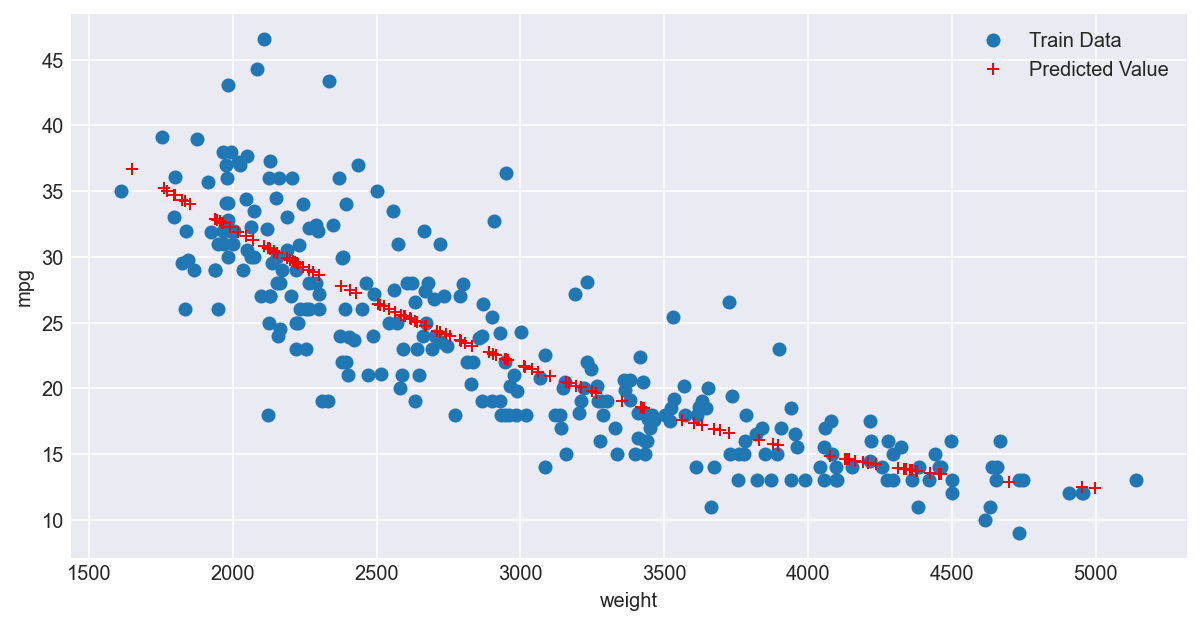

In [57]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data')
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')

plt.xlabel('weight')
plt.ylabel('mpg')


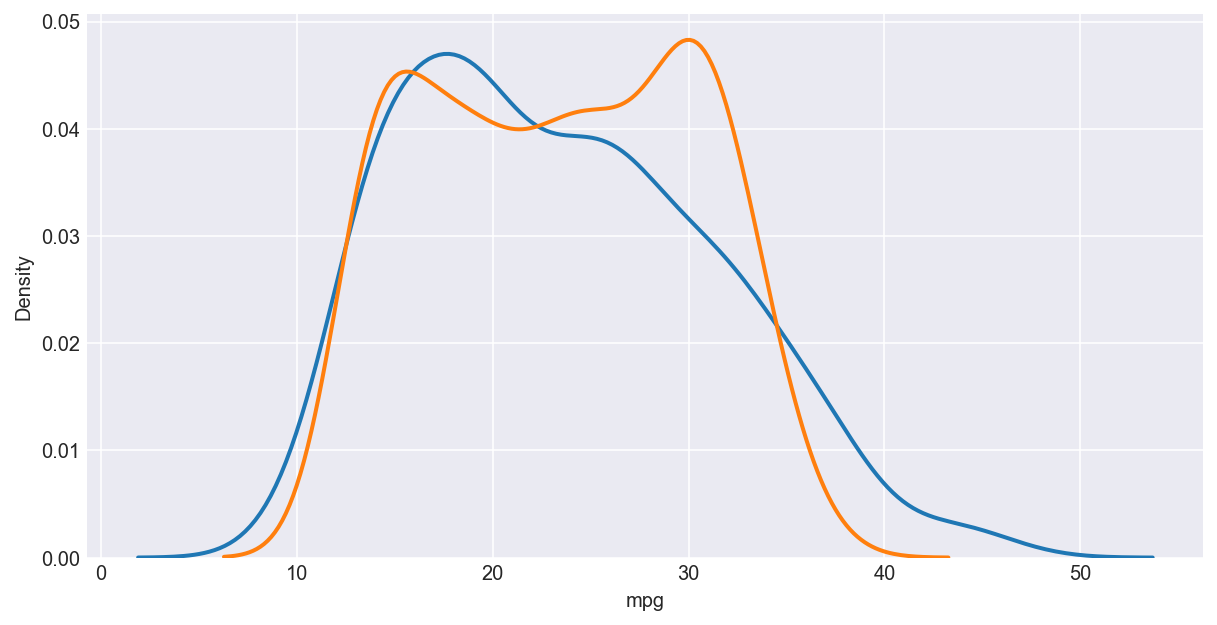

In [60]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10,5))
ax1=sns.distplot(y,hist=False, label='y')
ax2=sns.distplot(y_hat,hist=False, label='y_hat')

## 다중회귀분석
- 여러개의 독립변수가 종속 변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립변수의 계수와 상수항에 적절한 값들ㅇ르 찾아서 모형을 완성. 지도학습 

In [62]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [68]:
X = ndf[['cylinders','horsepower','weight']]
y = ndf['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
# r_square = lr.score(X_test, y_test)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'. format(mse, rmse, r2))


MSE:19.674, RMSE:4.436, R2 score:0.680


In [69]:
# 회귀식 기울기
print('X변수의 계수: ', lr.coef_)
print('절편: ', lr.intercept_)

X변수의 계수:  [-0.57598375 -0.03393439 -0.00537578]
절편:  45.990886941077676


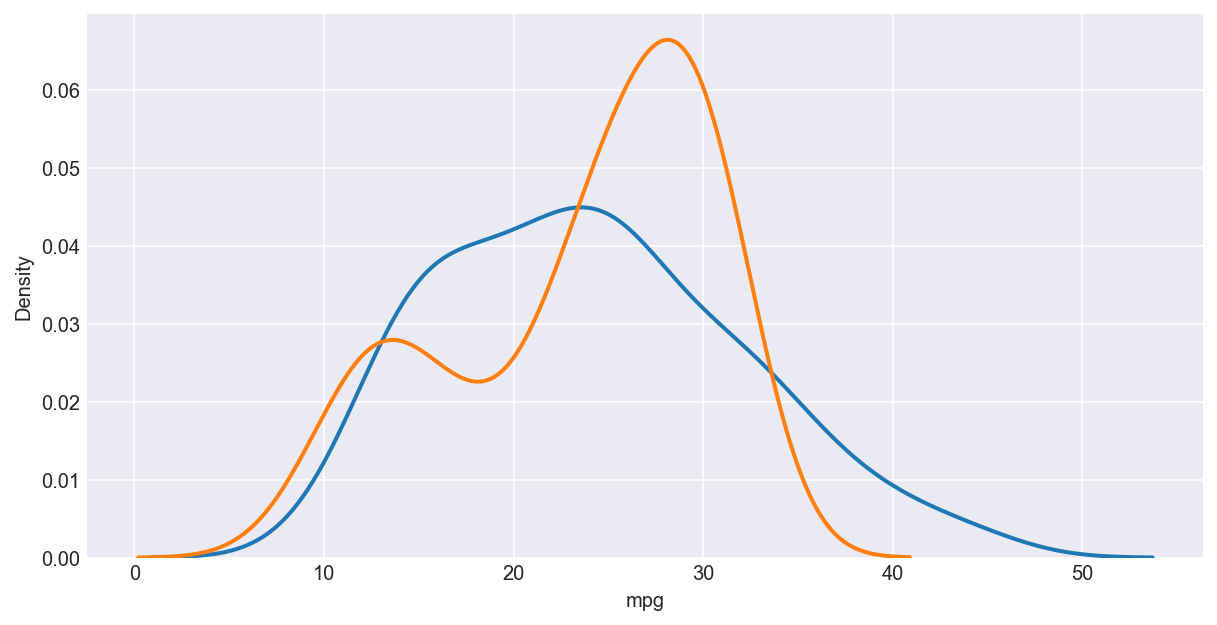

In [70]:
y_hat = lr.predict(X_test)
plt.figure(figsize=(10,5))
ax1=sns.distplot(y_test, hist=False, label='y_test')
ax2=sns.distplot(y_hat,hist=False, label="y_hat")


In [79]:
# 단위를 맞춰주기 위해서 scale 맞춰야
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ndf_ms = scaler.fit_transform(ndf)
ndf_ms_df = pd.DataFrame(data=ndf_ms, columns=ndf.columns)
ndf_ms_df.head()

,mpg,cylinders,horsepower,weight
0,0.239362,1.0,0.456522,0.536150
1,0.159574,1.0,0.646739,0.589736
2,0.239362,1.0,0.565217,0.516870
3,0.186170,1.0,0.565217,0.516019
4,0.212766,1.0,0.510870,0.520556


In [80]:
# 위에걸로 R_square 구해보기

X = ndf_ms_df[['cylinders','horsepower','weight']]
y = ndf_ms_df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=0)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
# r_square = lr.score(X_test, y_test)
r2 = r2_score(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)
print('MSE:{:.3f}, RMSE:{:.3f}, R2 score:{:.3f}'. format(mse, rmse, r2))

MSE:0.014, RMSE:0.118, R2 score:0.680


<AxesSubplot:xlabel='mpg', ylabel='Density'>

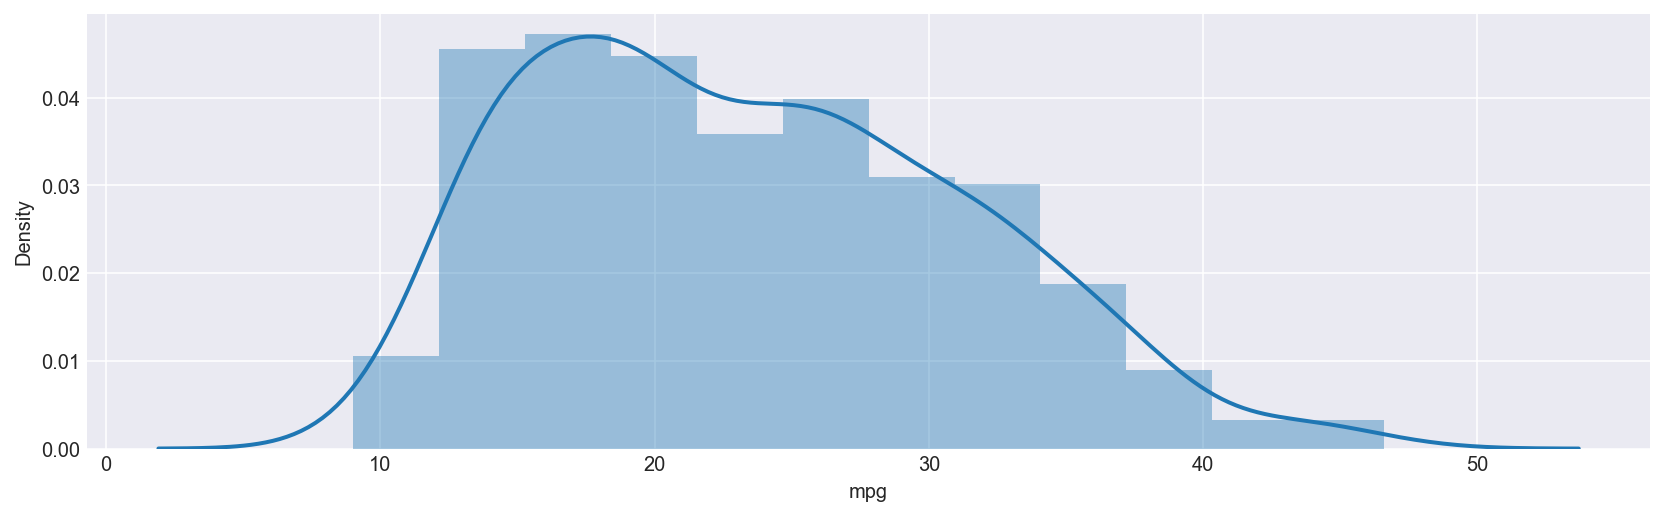

In [81]:
# 종속변수 분포보기
sns.distplot(ndf.mpg)
# 정규분포에 못미치는데 얘를 정규분포에 최대한 근접하게 되게 하려면?